<a href="https://colab.research.google.com/github/nickklos10/Concrete-Compressive-Strenght-Prediction/blob/main/Cement_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import Keras libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Import scikit-learn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [2]:
data_url = '/content/concrete_data.csv'
df = pd.read_csv(data_url)

In [3]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
df.isnull().sum()

,0
Cement,0
Blast Furnace Slag,0
Fly Ash,0
Water,0
Superplasticizer,0
Coarse Aggregate,0
Fine Aggregate,0
Age,0
Strength,0


In [5]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [6]:
X = df.drop('Strength', axis=1)
y = df['Strength']

In [7]:
scaler = StandardScaler()

# Fit the scaler to the predictors and transform
X_scaled = scaler.fit_transform(X)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42)

In [10]:
model = Sequential()

model.add(Dense(50, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=10,
    verbose=1
)

Epoch 1/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 1561.3596 - val_loss: 1280.1832
Epoch 2/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1115.0397 - val_loss: 557.6763
Epoch 3/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 363.6769 - val_loss: 215.6269
Epoch 4/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 213.7885 - val_loss: 188.0514
Epoch 5/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 206.0173 - val_loss: 170.0135
Epoch 6/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 182.6879 - val_loss: 160.2359
Epoch 7/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 182.3655 - val_loss: 152.0798
Epoch 8/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 177.4484 - val_loss: 151.7183
Epoch 9/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 138.3161 - val_loss: 141.8641
Epoch 10/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 168.4405 - val_loss: 139.9691
Epoch 11/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 139.2753 - val_loss: 141.7967
Epoch 12/100
58/

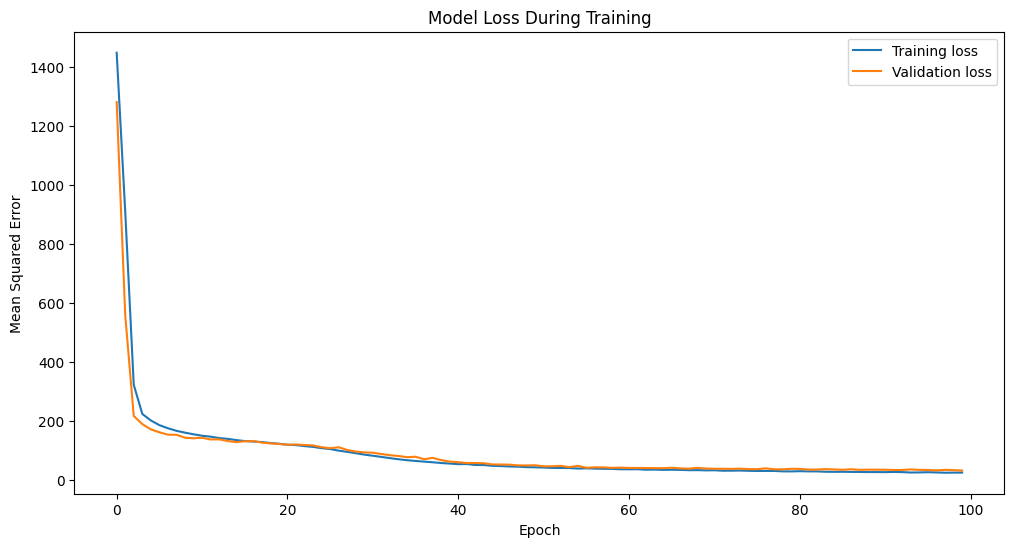

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Model Loss During Training')
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [14]:
y_pred = model.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [15]:
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error on Test Data:', mse)

Mean Squared Error on Test Data: 36.43626712252439
